## Loading and Preparing data

In [1]:
import os, shutil

In [2]:
original_data_dir ='Retinal_images'

In [3]:
import os
from PIL import Image

def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify that it is, in fact, an image
            except (IOError, SyntaxError) as e:
                print(f"Removing corrupted image: {file_path}")
                os.remove(file_path)

# Replace 'train_dir' and 'validation_dir' with the paths to your directories
remove_corrupted_images(original_data_dir)

In [4]:
train_Original='Retinal_images/train/Original'
train_Mask='Retinal_images/train/Ground truth'
test_Original='Retinal_images/test/Original'
test_Mask='Retinal_images/test/Ground truth'
validation_Original='Retinal_images/validation/Original'
validation_Mask='Retinal_images/validation/Ground truth'

In [5]:
# Function to count files in a directory
def count_files(directory):
    files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]
    return len(files)
    
# Count files in train directories
train_original_count = count_files(train_Original)
train_mask_count = count_files(train_Mask)

# Count files in test directories
test_original_count = count_files(test_Original)
test_mask_count = count_files(test_Mask)

# Count files in test directories
val_original_count = count_files(validation_Original)
val_mask_count = count_files(validation_Mask)

# Print the counts
print(f"Number of files in 'train/Original': {train_original_count}")
print(f"Number of files in 'train/Ground truth': {train_mask_count}")
print(f"Number of files in 'test/Original': {test_original_count}")
print(f"Number of files in 'test/Ground truth': {test_mask_count}")
print(f"Number of files in 'validation/Original': {val_original_count}")
print(f"Number of files in 'validation/Ground truth': {val_mask_count}")

Number of files in 'train/Original': 500
Number of files in 'train/Ground truth': 500
Number of files in 'test/Original': 200
Number of files in 'test/Ground truth': 200
Number of files in 'validation/Original': 100
Number of files in 'validation/Ground truth': 100


In [6]:
from skimage import io, transform
import os
import numpy as np

def process_images(directory, img_height=128, img_width=128, img_channels=3):
    train_ids = next(os.walk(directory))[2]
    if not train_ids:
        print(f"No files found in directory: {directory}")
        return None, None

    # Get the sorted list of image filenames
    train_ids = sorted(train_ids)
    sorted_train_filenames = sorted(train_ids, key=lambda x: int(x.split('_')[0]))

    resized_images = []
    corrupted_files = []

    for n, filename in enumerate(sorted_train_filenames, start=1):
        image_path = os.path.join(directory, filename)
        try:
            image = io.imread(image_path)
            # Print the first image details
            if n == 1:
                print(n, filename)
                print(image.shape)
            # Resize the image and ensure it has three channels
            resized_image = transform.resize(image, (img_height, img_width, img_channels), anti_aliasing=True)
            resized_images.append(resized_image)
            # Print details after resizing
            print(f'After resizing: {n} {filename} {resized_image.shape}')
        except Exception as e:
            print(f"Error loading image {filename}: {e}")
            corrupted_files.append(filename)

    # Convert the list of resized images to a numpy array
    if resized_images:
        resized_images_array = np.array(resized_images)
        # Print the shape of the resized images array
        print("Shape of resized_images array:", resized_images_array.shape)
    else:
        print("No valid images were loaded and resized.")
        resized_images_array = None

    return resized_images_array, corrupted_files

train_original, train_corrupted = process_images(train_Original)
test_original, test_corrupted = process_images(test_Original)
val_original,val_corrupted=process_images(validation_Original)

1 26_A.png
(2048, 2048, 3)
After resizing: 1 26_A.png (128, 128, 3)
After resizing: 2 27_A.png (128, 128, 3)
After resizing: 3 28_A.png (128, 128, 3)
After resizing: 4 29_A.png (128, 128, 3)
After resizing: 5 30_A.png (128, 128, 3)
After resizing: 6 31_A.png (128, 128, 3)
After resizing: 7 32_A.png (128, 128, 3)
After resizing: 8 33_A.png (128, 128, 3)
After resizing: 9 34_A.png (128, 128, 3)
After resizing: 10 35_A.png (128, 128, 3)
After resizing: 11 36_A.png (128, 128, 3)
After resizing: 12 37_A.png (128, 128, 3)
After resizing: 13 38_A.png (128, 128, 3)
After resizing: 14 39_A.png (128, 128, 3)
After resizing: 15 40_A.png (128, 128, 3)
After resizing: 16 41_A.png (128, 128, 3)
After resizing: 17 42_A.png (128, 128, 3)
After resizing: 18 43_A.png (128, 128, 3)
After resizing: 19 44_A.png (128, 128, 3)
After resizing: 20 45_A.png (128, 128, 3)
After resizing: 21 46_A.png (128, 128, 3)
After resizing: 22 47_A.png (128, 128, 3)
After resizing: 23 48_A.png (128, 128, 3)
After resizing: 

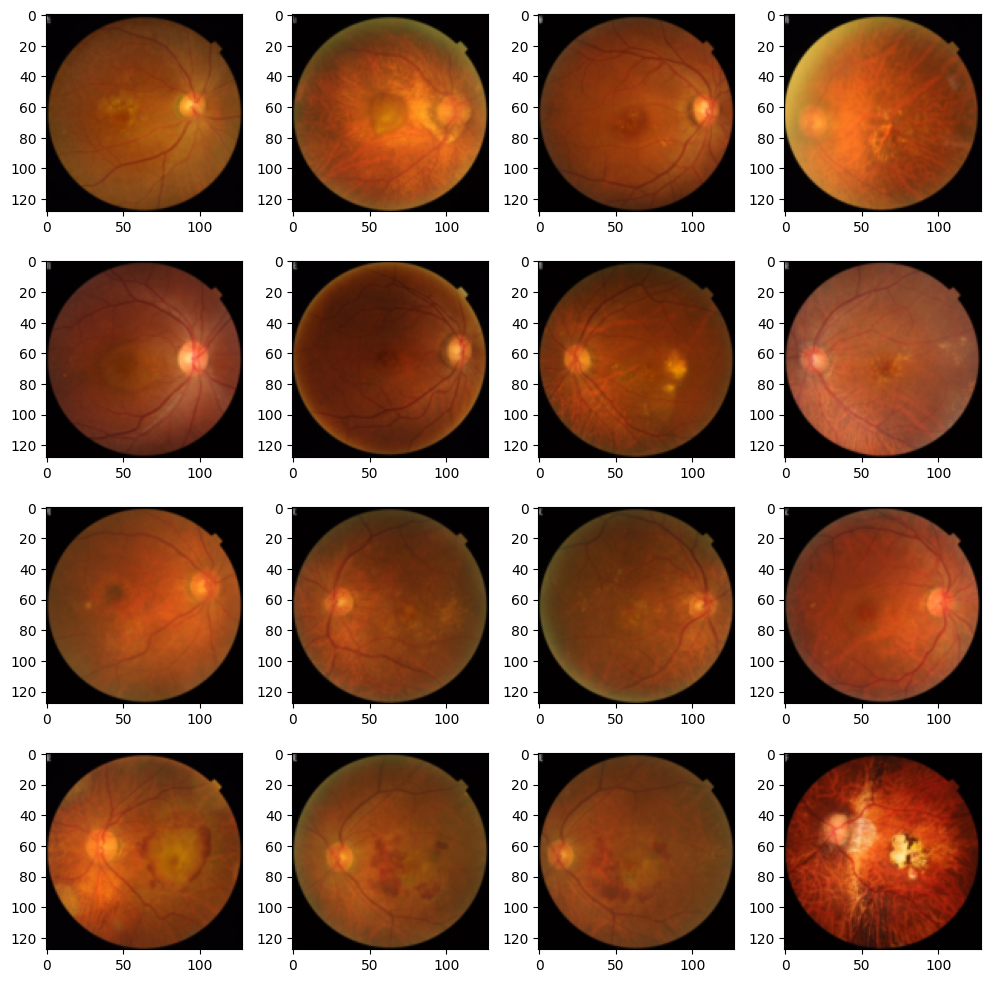

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_original[i])
plt.tight_layout()
plt.show()

In [8]:
from skimage import io, transform, color

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

def resize_and_convert_grayscale(mask_dir, img_height, img_width):
    # Get the list of filenames in the mask directory
    mask_ids = sorted(next(os.walk(mask_dir))[2])
    sorted_mask_filenames = sorted(mask_ids, key=lambda x: int(x.split('_')[0]))

    resized_images = []
    for n, filename in enumerate(sorted_mask_filenames, start=1):
        image_path = os.path.join(mask_dir, filename)
        image = io.imread(image_path)
        
        # Convert to grayscale if the image is RGB or RGBA
        if len(image.shape) == 3:
            if image.shape[2] == 3:  # RGB
                image = color.rgb2gray(image)
            elif image.shape[2] == 4:  # RGBA
                # Extract RGB channels and calculate grayscale equivalent
                image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
        
        height, width = image.shape
        if n == 1:
            print(f"Image details: {filename}, Shape: {image.shape}")
        
        # Resize the image
        resized_image = transform.resize(image, (img_height, img_width), anti_aliasing=True)
        
        # Ensure the image is boolean type
        resized_image = resized_image.astype(bool)
        
        # Expand dimensions to (height, width, 1)
        resized_image = np.expand_dims(resized_image, axis=-1)
        
        resized_images.append(resized_image)
    
    resized_images_array = np.array(resized_images)
    print("Shape of resized images array:", resized_images_array.shape)
    
    return resized_images_array

train_mask_resized = resize_and_convert_grayscale(train_Mask, IMG_HEIGHT, IMG_WIDTH)
test_mask_resized = resize_and_convert_grayscale(test_Mask, IMG_HEIGHT, IMG_WIDTH)
val_mask_resized=resize_and_convert_grayscale(validation_Mask,IMG_HEIGHT,IMG_WIDTH)

# Check the shape and dtype of the resized masks
print("Shape of train_mask_resized:", train_mask_resized.shape)
print("Shape of test_mask_resized:", test_mask_resized.shape)
print("Shape of val_mask_resized:", val_mask_resized.shape)
print("Data type of train_mask_resized:", train_mask_resized.dtype)
print("Data type of test_mask_resized:", test_mask_resized.dtype)
print("Data type of val_mask_resized:", val_mask_resized.dtype)
print("Data type of val_original:", val_original.dtype)

Image details: 26_A.png, Shape: (2048, 2048)
Shape of resized images array: (500, 128, 128, 1)
Image details: 1_A.png, Shape: (2048, 2048)
Shape of resized images array: (200, 128, 128, 1)
Image details: 1_A.png, Shape: (2048, 2048)
Shape of resized images array: (100, 128, 128, 1)
Shape of train_mask_resized: (500, 128, 128, 1)
Shape of test_mask_resized: (200, 128, 128, 1)
Shape of val_mask_resized: (100, 128, 128, 1)
Data type of train_mask_resized: bool
Data type of test_mask_resized: bool
Data type of val_mask_resized: bool
Data type of val_original: float64


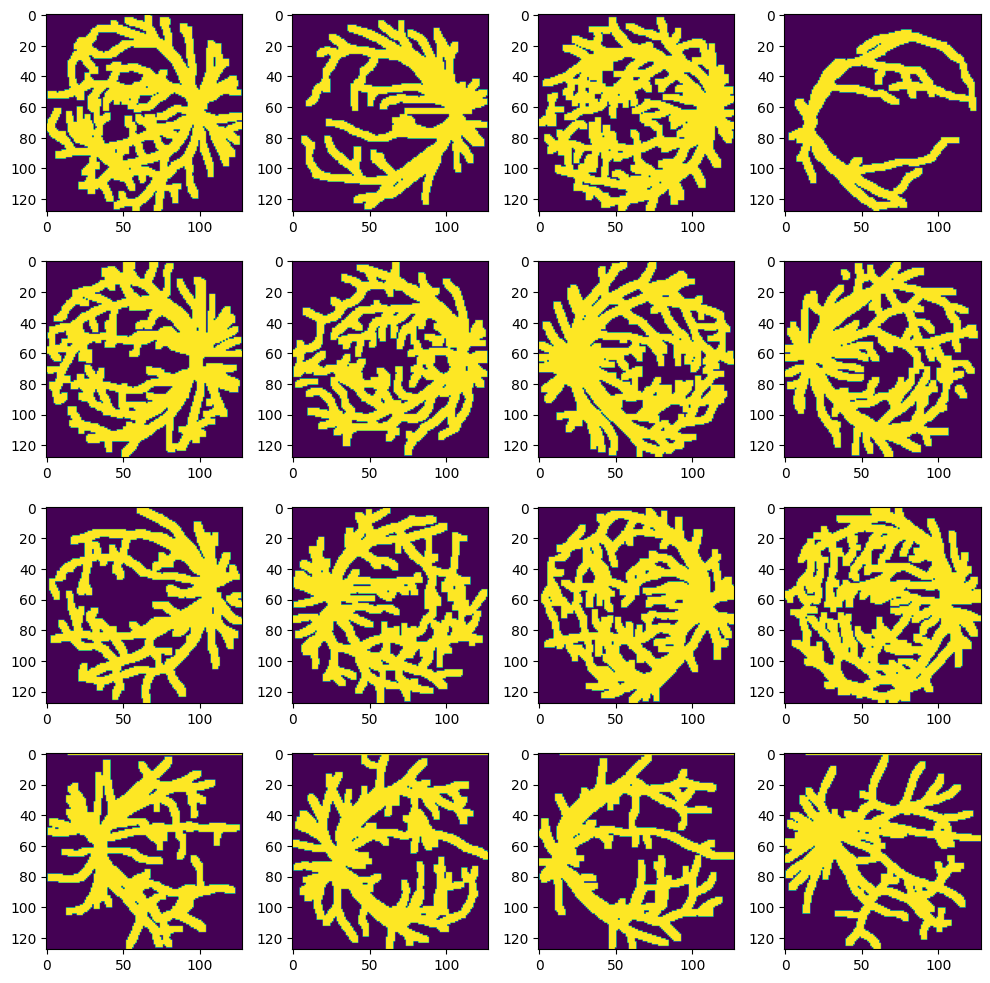

In [9]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_mask_resized[i])
plt.tight_layout()
plt.show()

In [10]:
X_train = np.array(train_original, dtype='float64')
Y_train = np.array(train_mask_resized, dtype=bool)
X_val=np.array(val_original,dtype='float64')
Y_val=np.array(val_mask_resized,dtype=bool)
X_test=np.array(test_original,dtype='float64')
Y_test=np.array(test_mask_resized,dtype=bool)

In [11]:
print(f"Shape of X_train: {X_train.shape}, dtype: {X_train.dtype}")
print(f"Shape of Y_train: {Y_train.shape}, dtype: {Y_train.dtype}")
print(f"Shape of X_val: {X_val.shape}, dtype: {X_val.dtype}")
print(f"Shape of Y_val: {Y_val.shape}, dtype: {Y_val.dtype}")
print(f"Shape of X_test: {X_test.shape}, dtype: {X_test.dtype}")
print(f"Shape of Y_test: {Y_test.shape}, dtype: {Y_test.dtype}")

Shape of X_train: (500, 128, 128, 3), dtype: float64
Shape of Y_train: (500, 128, 128, 1), dtype: bool
Shape of X_val: (100, 128, 128, 3), dtype: float64
Shape of Y_val: (100, 128, 128, 1), dtype: bool
Shape of X_test: (200, 128, 128, 3), dtype: float64
Shape of Y_test: (200, 128, 128, 1), dtype: bool


In [12]:
np.save('X_train_new.npy', X_train)
np.save('Y_train_new.npy', Y_train)

In [13]:
np.save('val_original_new.npy', X_val)
np.save('val_masks_new.npy', Y_val)

In [14]:
np.save('test_original_new.npy', X_test)
np.save('test_masks_new.npy', Y_test)